In [1]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def load_data(string, list_dir = '../DanielCorley/user-site-export'):
    
    '''
    pass in the first three letters of the file you're trying to load:
        ['ste', 'dis', 'hea', 'ste']
    
    
    '''
    file_dict = {
        'ste': 'step_df',
        'dis': 'dist_df',
        'hea': 'heart_df',
        'sle': 'sleep_df',
        'est': 'oxy_df'
    }
    if string not in file_dict:
        raise Exception('string not recognized!')
    
    try:
        df = pd.read_pickle(file_dict[string])
        print('loading from pickle')
        return df
    except IOError:
        print('loading from file storage')
        files = [x for x in os.listdir(list_dir) if x[:3] == string]
        print(f'example file name: {files[0]}')
        print(f'number of files: {len(files)}')
        
        file_type = None
        try:
            pd.read_json(f'{list_dir}/{files[0]}')
            file_type = 'json'
            print('loading json')
        except:
            file_type = 'csv'
            print('loading csv')
            
        # iterate over the files and append to one dataframe
        df = pd.DataFrame()
        for i,file in enumerate(files):
            print(i, end=', ' if file != files[-1] else '\n')
            if file_type == 'json':
                df = df.append(pd.read_json(f'{list_dir}/{file}'))
            else:
                df = df.append(pd.read_csv(f'{list_dir}/{file}'))
        df.to_pickle(file_dict[string])
        return df
    finally:
        print('files done!')

# steps

In [3]:
step_df = load_data('ste')

loading from file storage
example file name: steps-2016-04-19.json
number of files: 41
loading json
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40
files done!


In [4]:
step_df.head()

,dateTime,value
0,2016-04-21 05:00:00,0
1,2016-04-21 05:01:00,0
2,2016-04-21 05:02:00,0
3,2016-04-21 05:03:00,0
4,2016-04-21 05:04:00,0


In [5]:
step_df.set_index('dateTime', inplace=True)

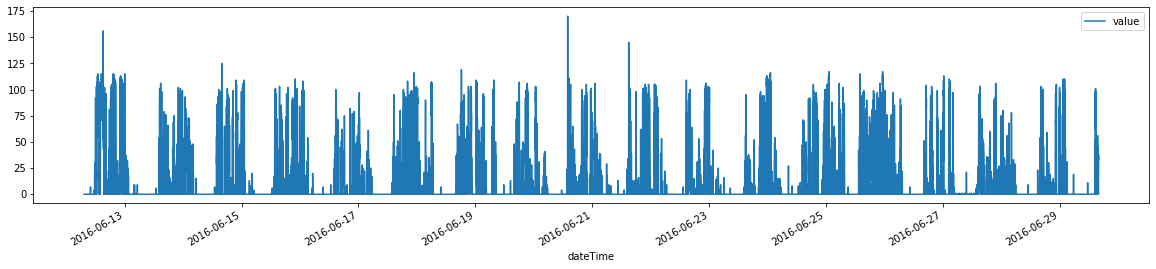

In [6]:
step_df[75000:100000].plot(figsize=(20,4));

In [7]:
df_day = step_df.resample('d').sum().fillna(0)

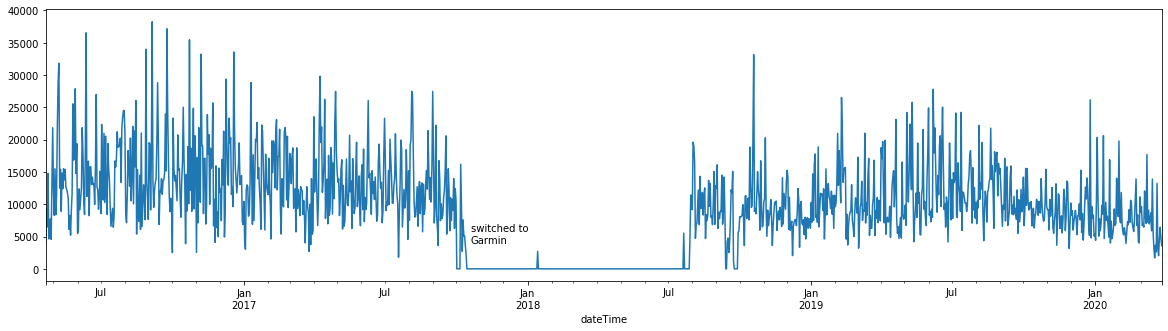

In [8]:
df_day['value'].plot(figsize=(20,5))
plt.text('2017-10-20', 4000, 'switched to\nGarmin');

# heart rate

In [9]:
heart_df = load_data('hea')

loading from file storage
example file name: heart_rate-2016-04-27.json
number of files: 1111
loading json
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200

In [10]:
heart_df.shape

(15620454, 2)

In [11]:
%%time
heart_df['bpm'] = heart_df.value.map(lambda x: x['bpm'])
heart_df['confidence'] = heart_df.value.map(lambda x: x['confidence'])
heart_df.drop(columns=['value'], inplace=True)

CPU times: user 16.9 s, sys: 1.91 s, total: 18.8 s
Wall time: 17.2 s


In [12]:
heart_df.set_index('dateTime', inplace=True)

In [13]:
heart_df.confidence.unique()

array([0, 1, 2, 3])

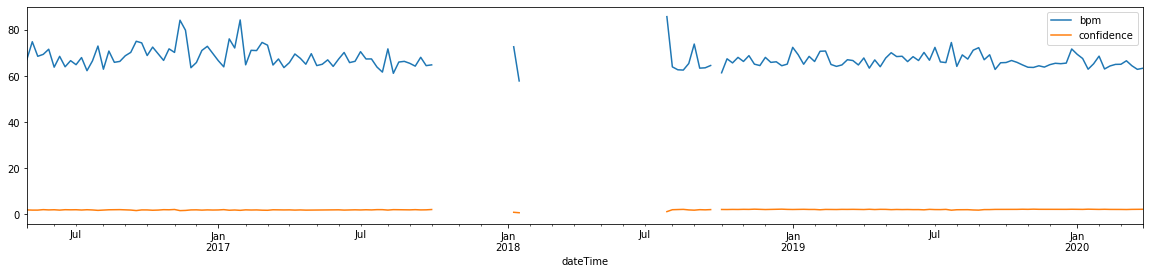

In [14]:
heart_df.resample('w').mean().plot(figsize=(20,4));

# distance

In [15]:
dist_df = load_data('dis')

loading from file storage
example file name: distance-2016-04-19.json
number of files: 41
loading json
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40
files done!


In [16]:
dist_df.head()

,dateTime,value
0,2016-04-21 05:00:00,0
1,2016-04-21 05:01:00,0
2,2016-04-21 05:02:00,0
3,2016-04-21 05:03:00,0
4,2016-04-21 05:04:00,0


In [17]:
dist_df.set_index('dateTime', inplace=True)

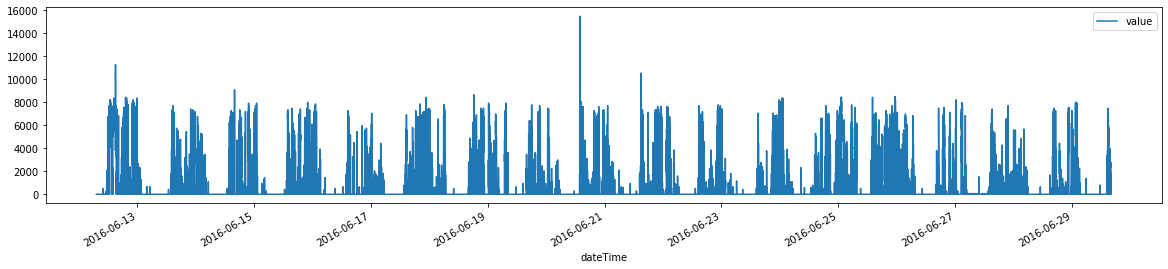

In [18]:
dist_df[75000:100000].plot(figsize=(20,4));

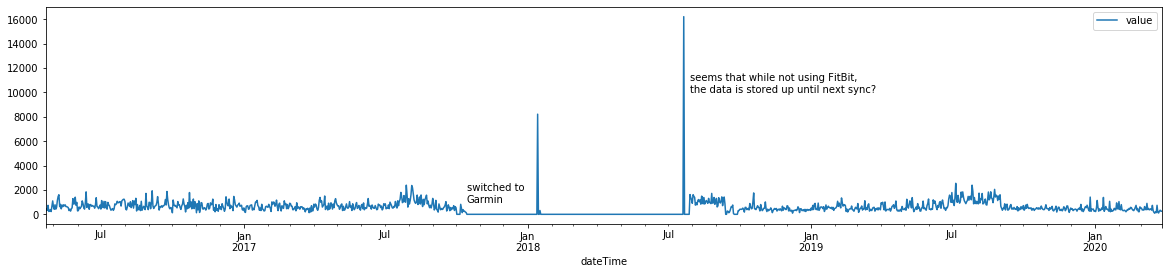

In [19]:
df_day = dist_df.resample('d').mean().fillna(0)
df_day.plot(figsize=(20,4))
plt.text('2017-10-15', 1000, 'switched to\nGarmin')
plt.text('2018-07-29', 10000, 'seems that while not using FitBit,\nthe data is stored up until next sync?');

# sleep

In [20]:
sleep_df = load_data('sle')

loading from file storage
example file name: sleep-2016-04-19.json
number of files: 39
loading json
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38
files done!


In [21]:
sleep_df.head(2)

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
0,11675995227,2016-05-19,2016-05-18T23:16:00.000,2016-05-19T08:37:30.000,33660000,0,529,32,0,561,94,classic,0,"{'summary': {'restless': {'count': 21, 'minute...",True
1,11675995226,2016-05-18,2016-05-17T23:42:00.000,2016-05-18T08:40:30.000,32280000,0,516,22,0,538,96,classic,0,"{'summary': {'restless': {'count': 14, 'minute...",True


In [22]:
sleep_df.startTime = pd.to_datetime(sleep_df.startTime)
sleep_df.set_index('startTime', inplace=True)

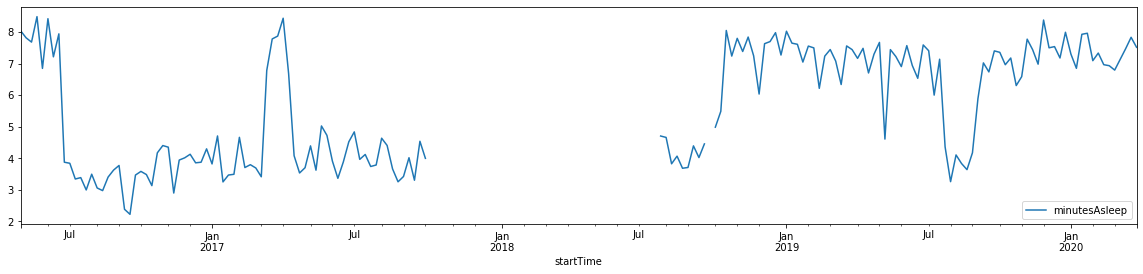

In [23]:
(sleep_df.resample('w').agg({'minutesAsleep':'mean'})/60).plot(figsize=(20,4));

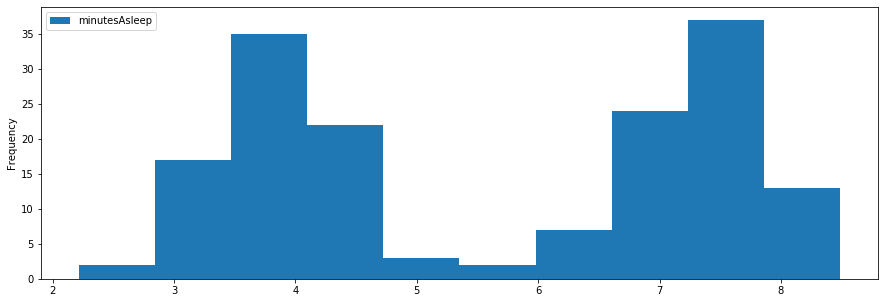

In [24]:
(sleep_df.resample('w').agg({'minutesAsleep':'mean'})/60).plot(kind='hist', figsize=(15,5));

# Estimated Oxygen Variation

In [54]:
oxy_df = load_data('est')

loading from pickle
files done!


In [56]:
oxy_df['timestamp'] = pd.to_datetime(oxy_df['timestamp'])
oxy_df = oxy_df.set_index('timestamp')

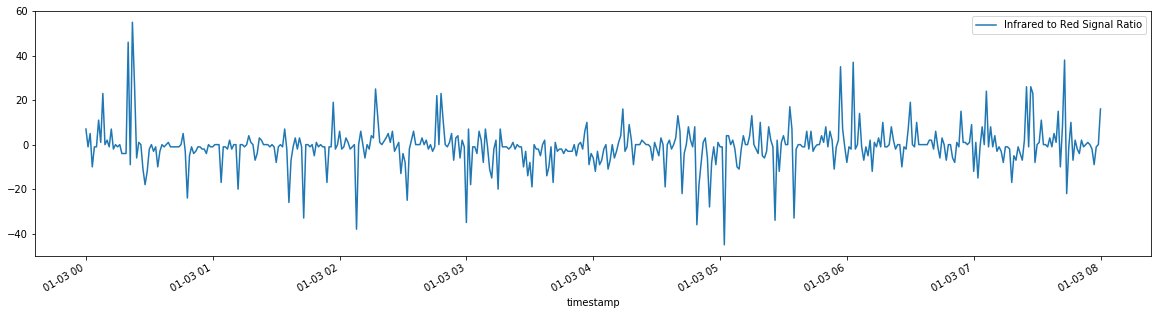

In [83]:
oxy_df.loc['2020-01-03'].plot(figsize=(20,5))

# Polar Chart

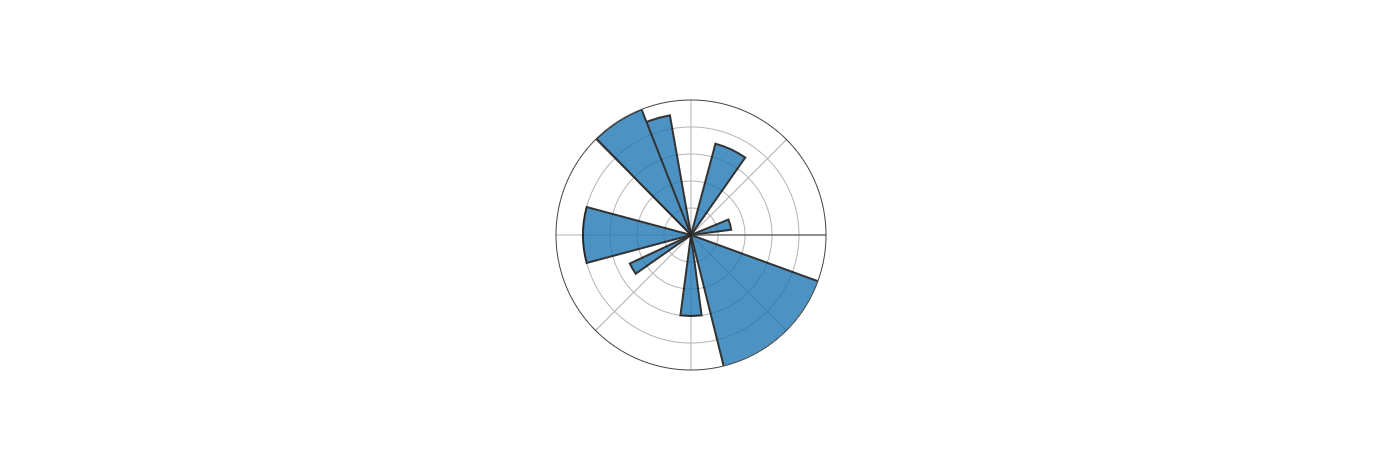

In [97]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(
    r=[3.5, 1.5, 2.5, 4.5, 4.5, 4, 3,5,7,7],
    theta=[65, 15, 210, 110, 312.5, 180, 270,123,312],
    width=[20,15,10,20,15,30,15,23,56,67],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8
))

fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0, 5], showticklabels=False, ticks=''),
        angularaxis = dict(showticklabels=False, ticks='')
    )
)

fig.show()